#  WEEK 3
# Univariate & Bivariate Analysis

In [25]:
import pandas as pd 
df = pd.read_csv("C:\\Users\lovely\Downloads\Indian_Kids_Screen_Time_final.csv")
df.head(9)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Device_Share,Edu_Recreational_Percent
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teen,0.470346,42.0
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen,0.147549,30.0
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teen,0.256075,32.0
3,15,Female,1.21,Laptop,False,0.39,Unknown,Urban,Teen,0.147549,39.0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen,0.470346,49.0
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Teen,0.470346,44.0
6,17,Male,2.97,TV,False,0.48,Unknown,Rural,Teen,0.256075,48.0
7,10,Male,2.74,TV,True,0.54,Unknown,Urban,Pre-Teen,0.256075,54.0
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Teen,0.147549,36.0


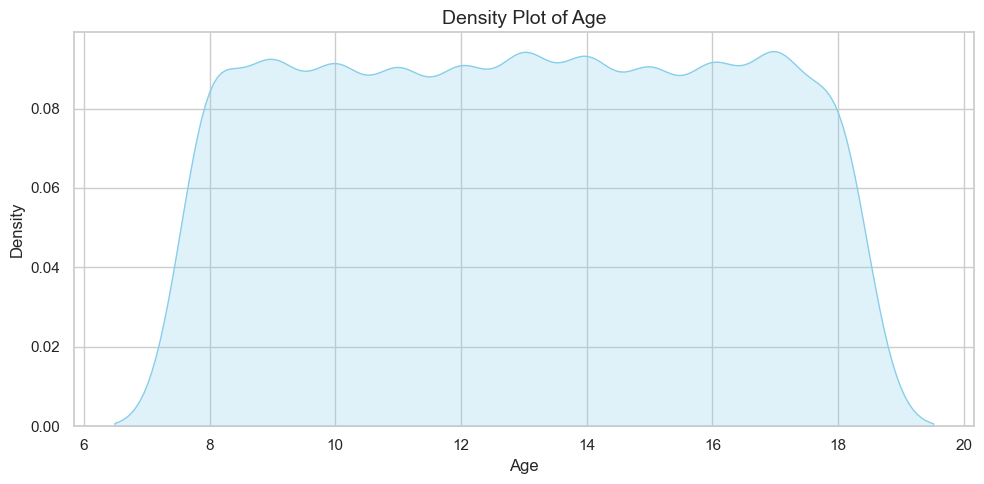

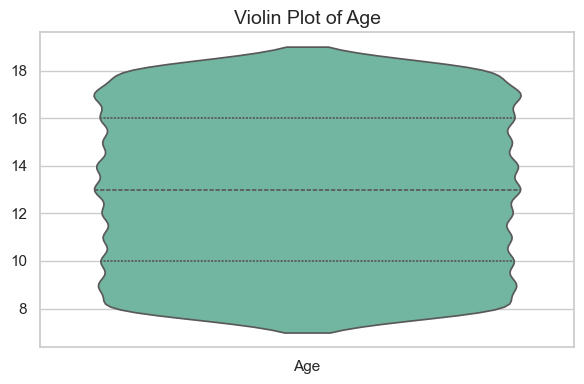

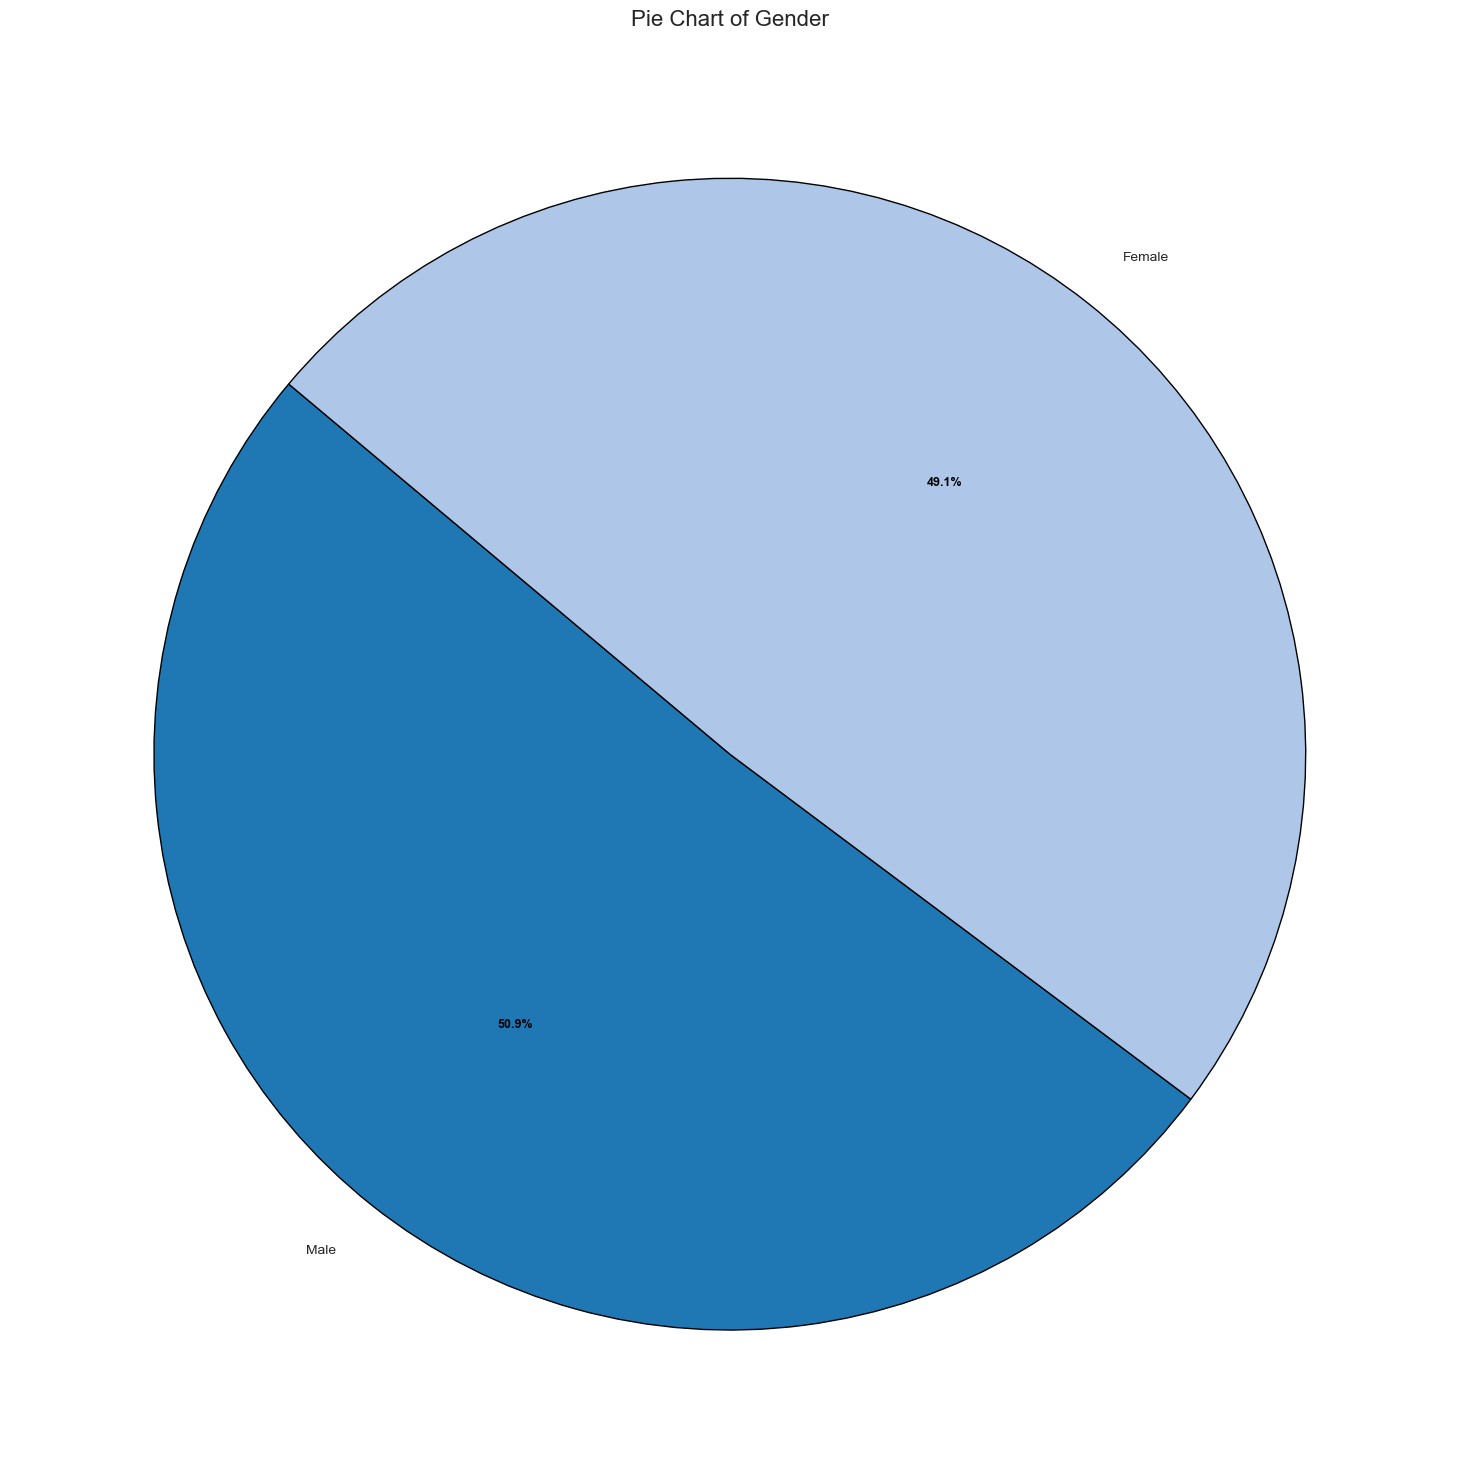

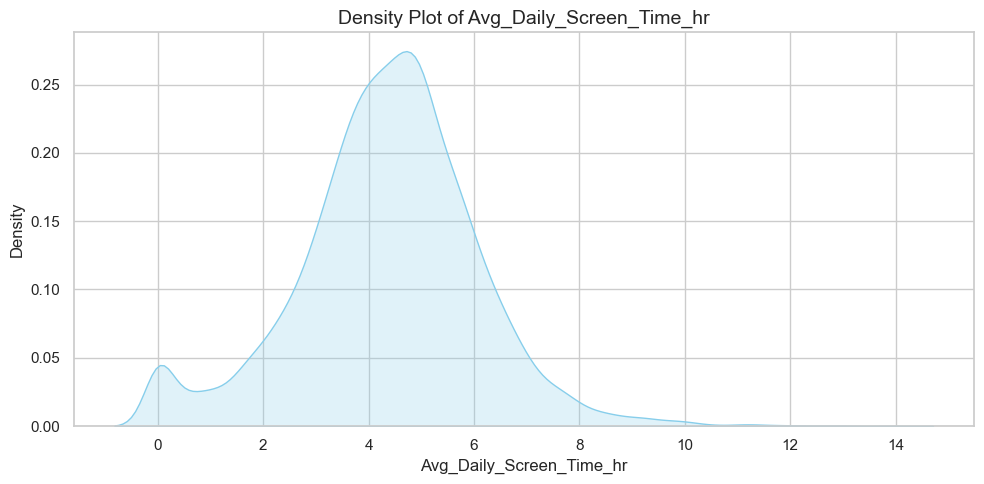

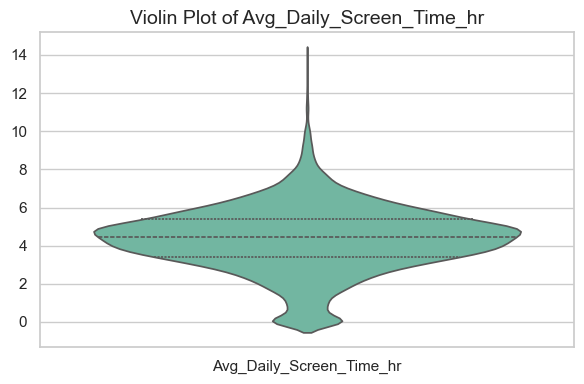

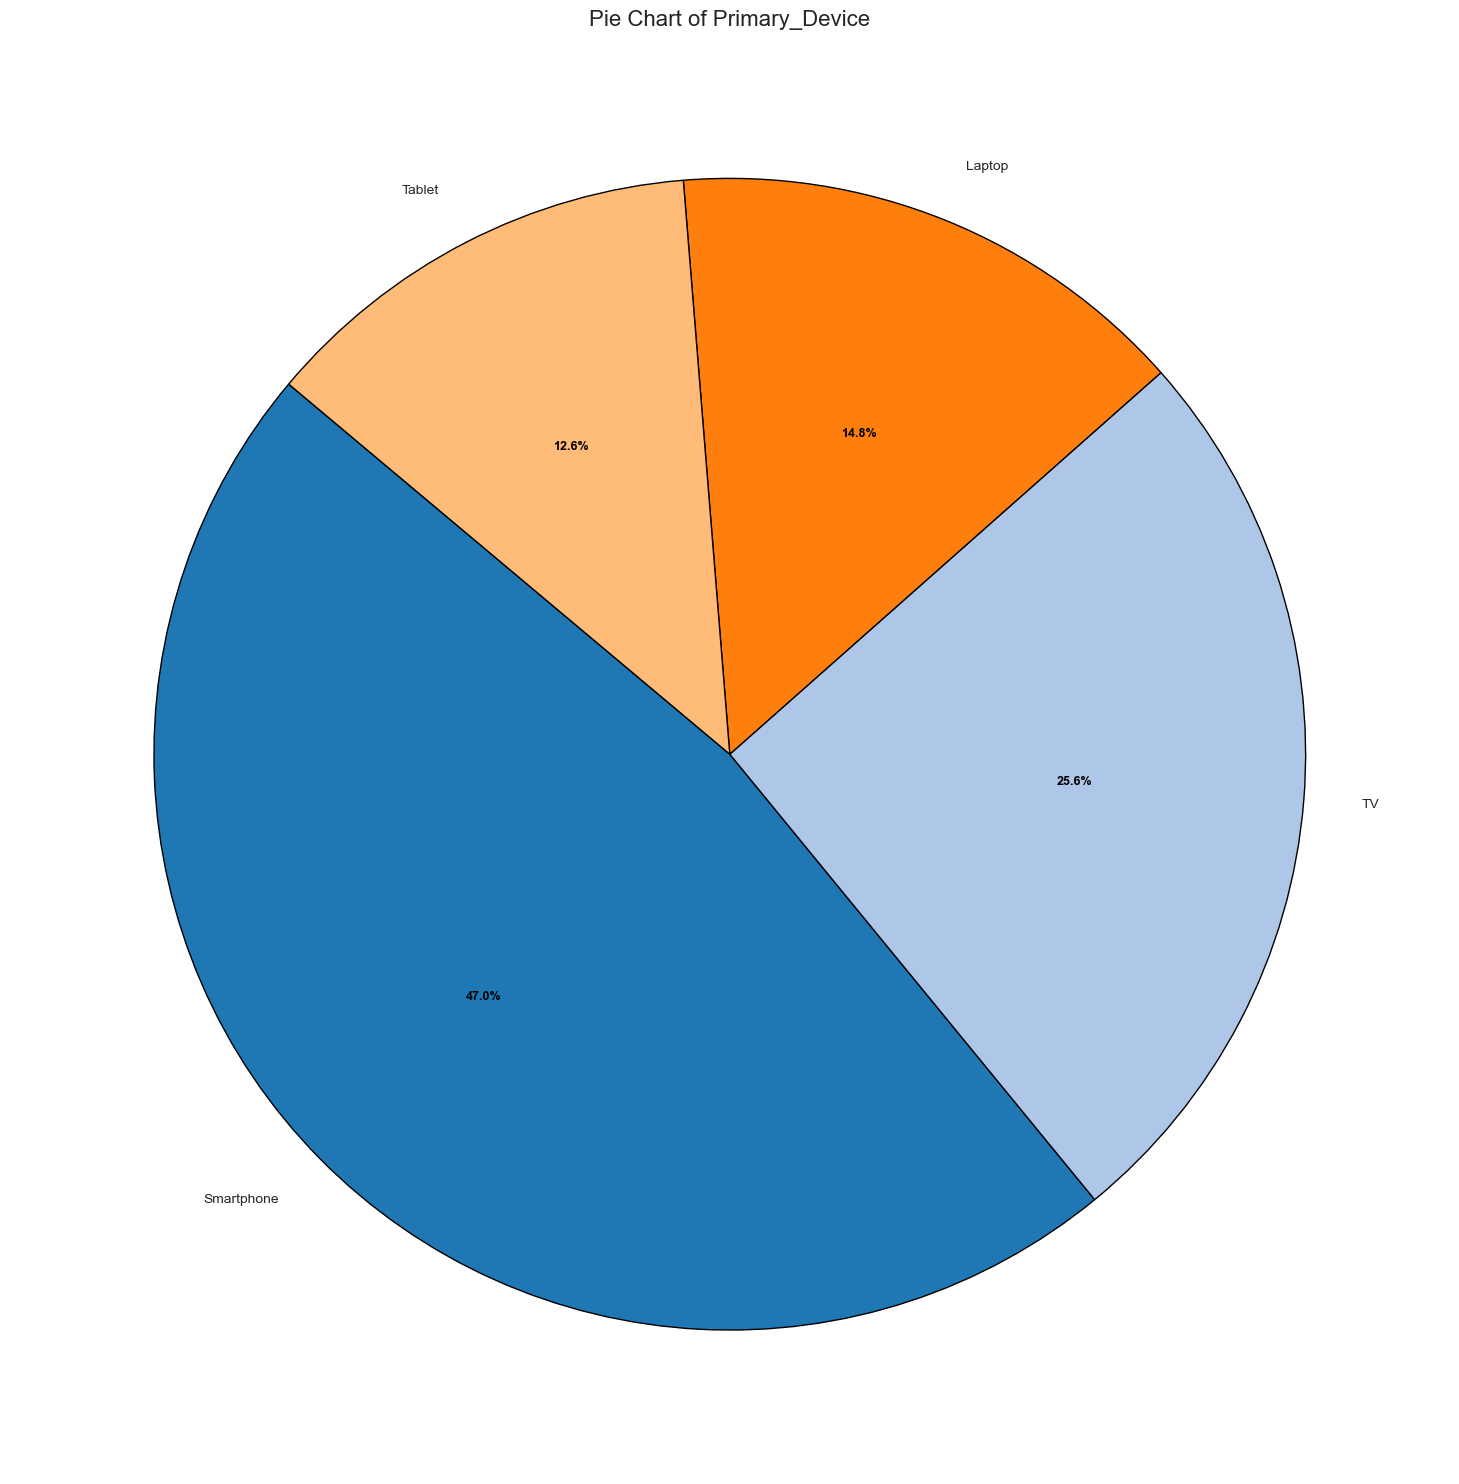

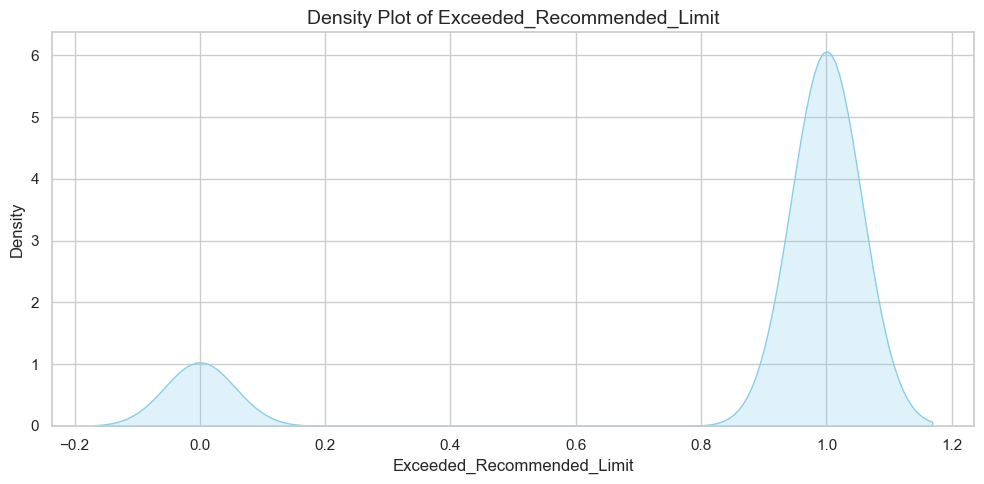

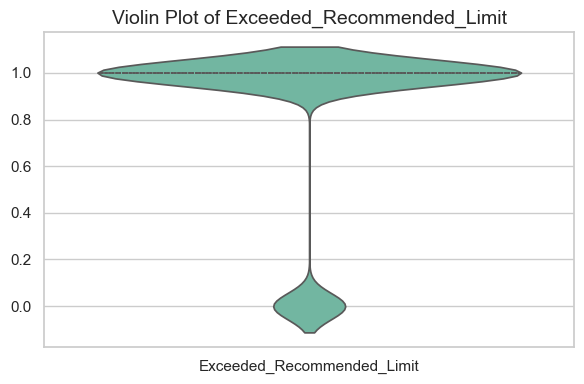

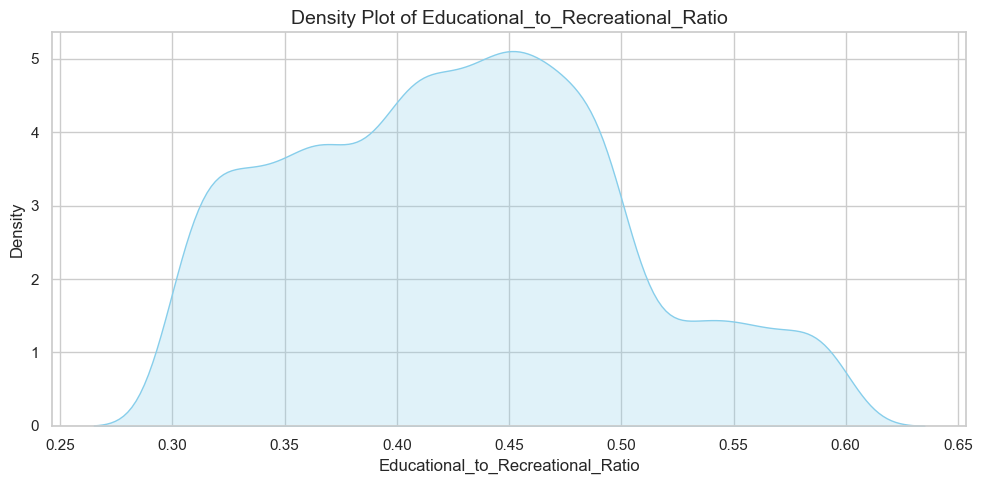

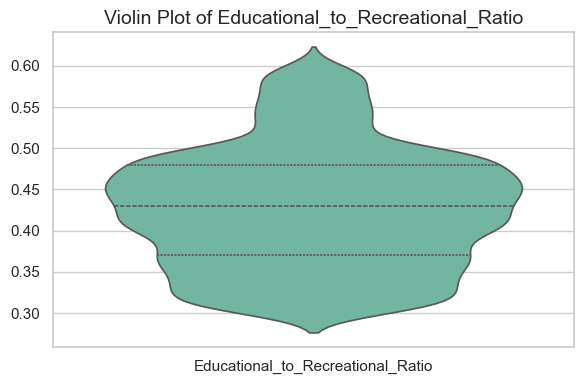

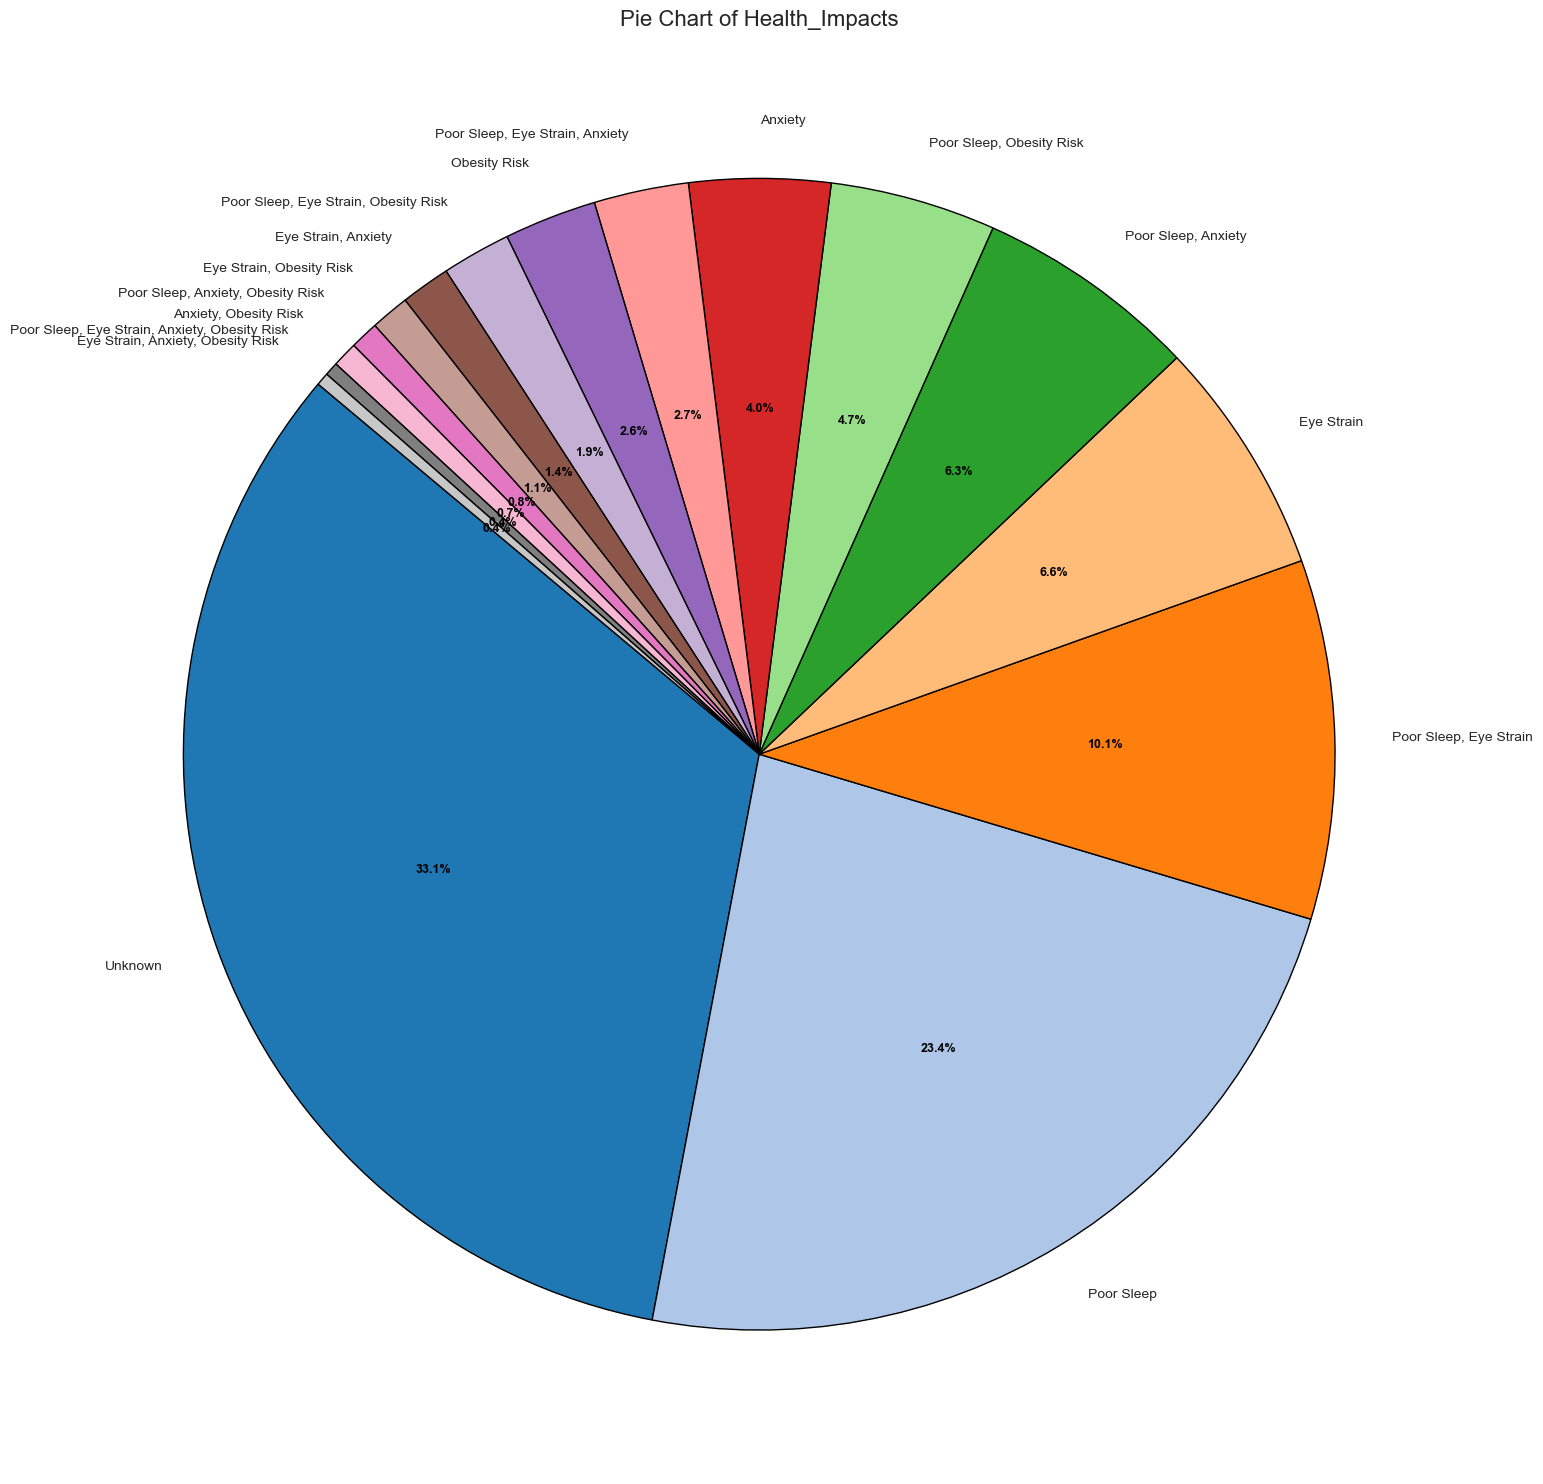

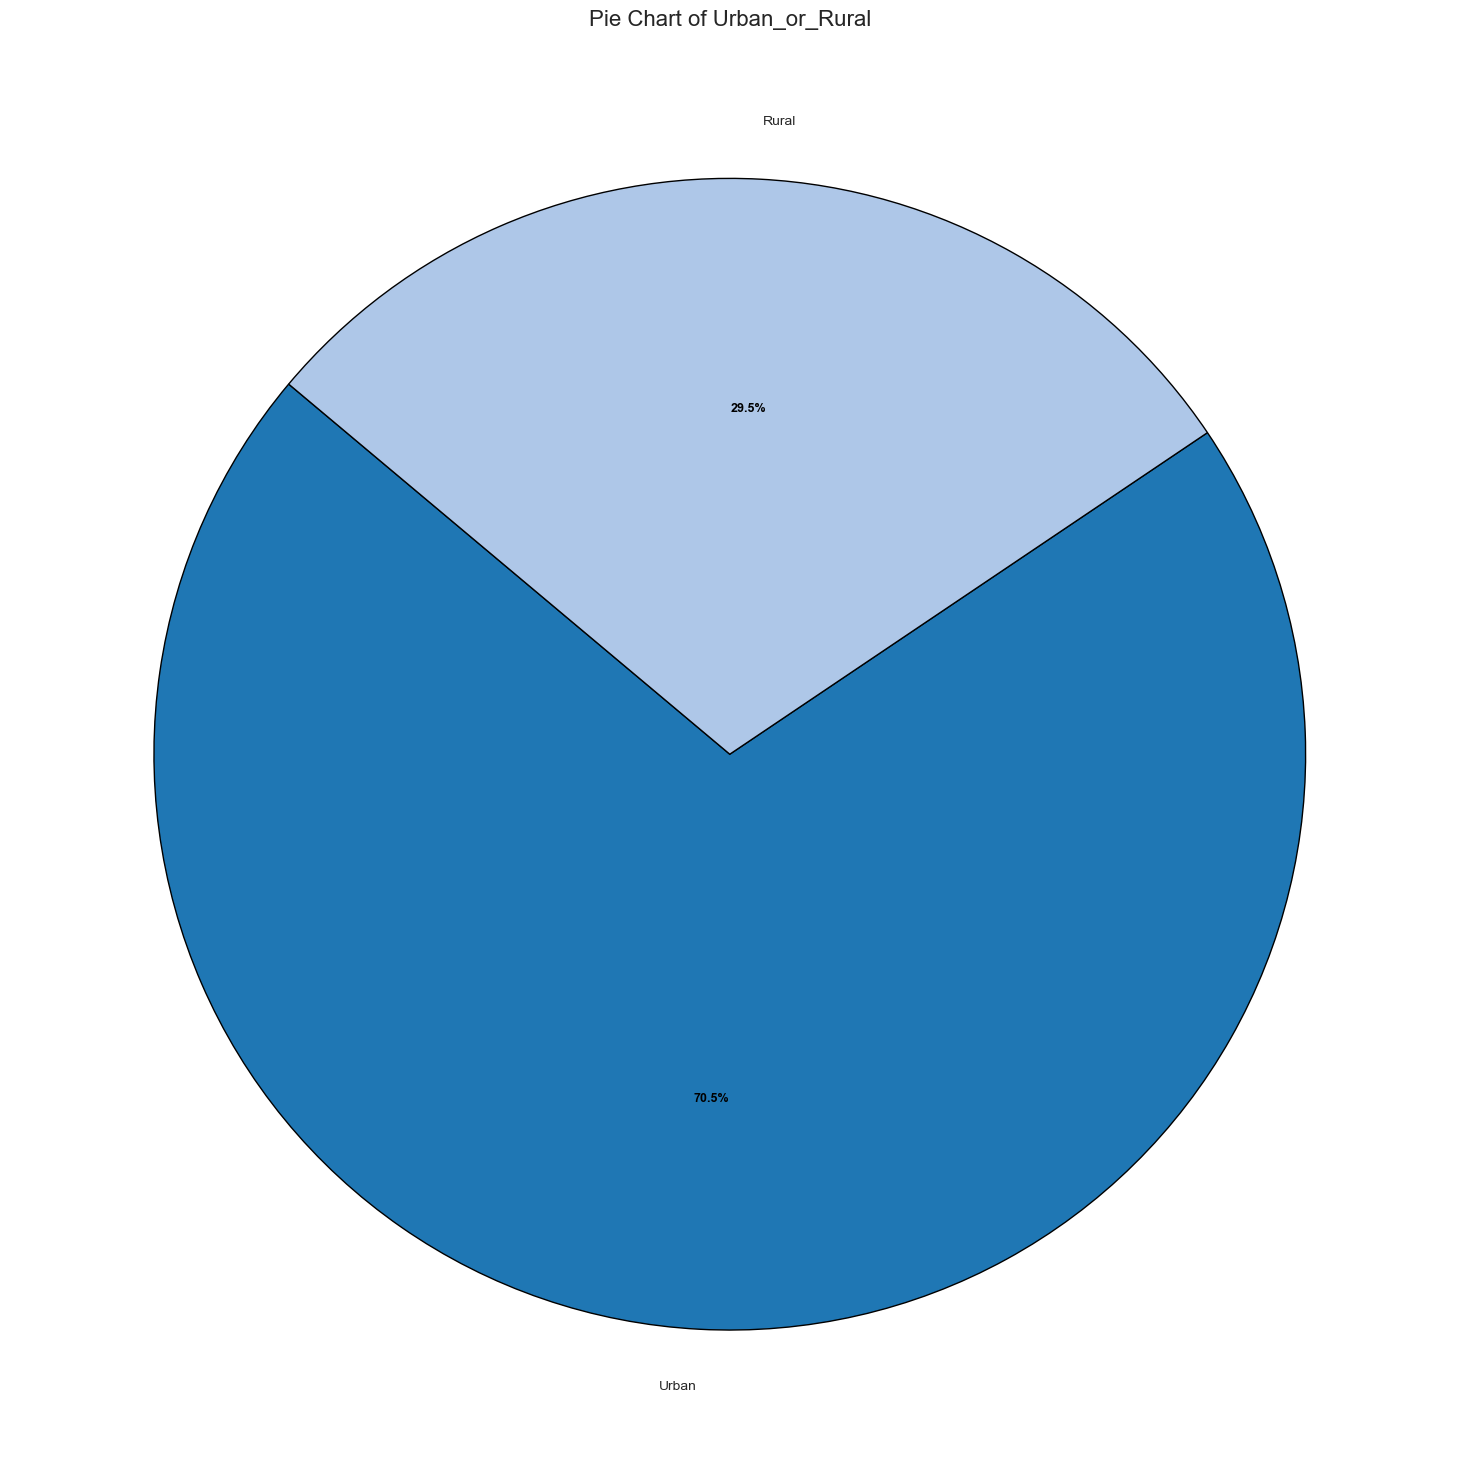

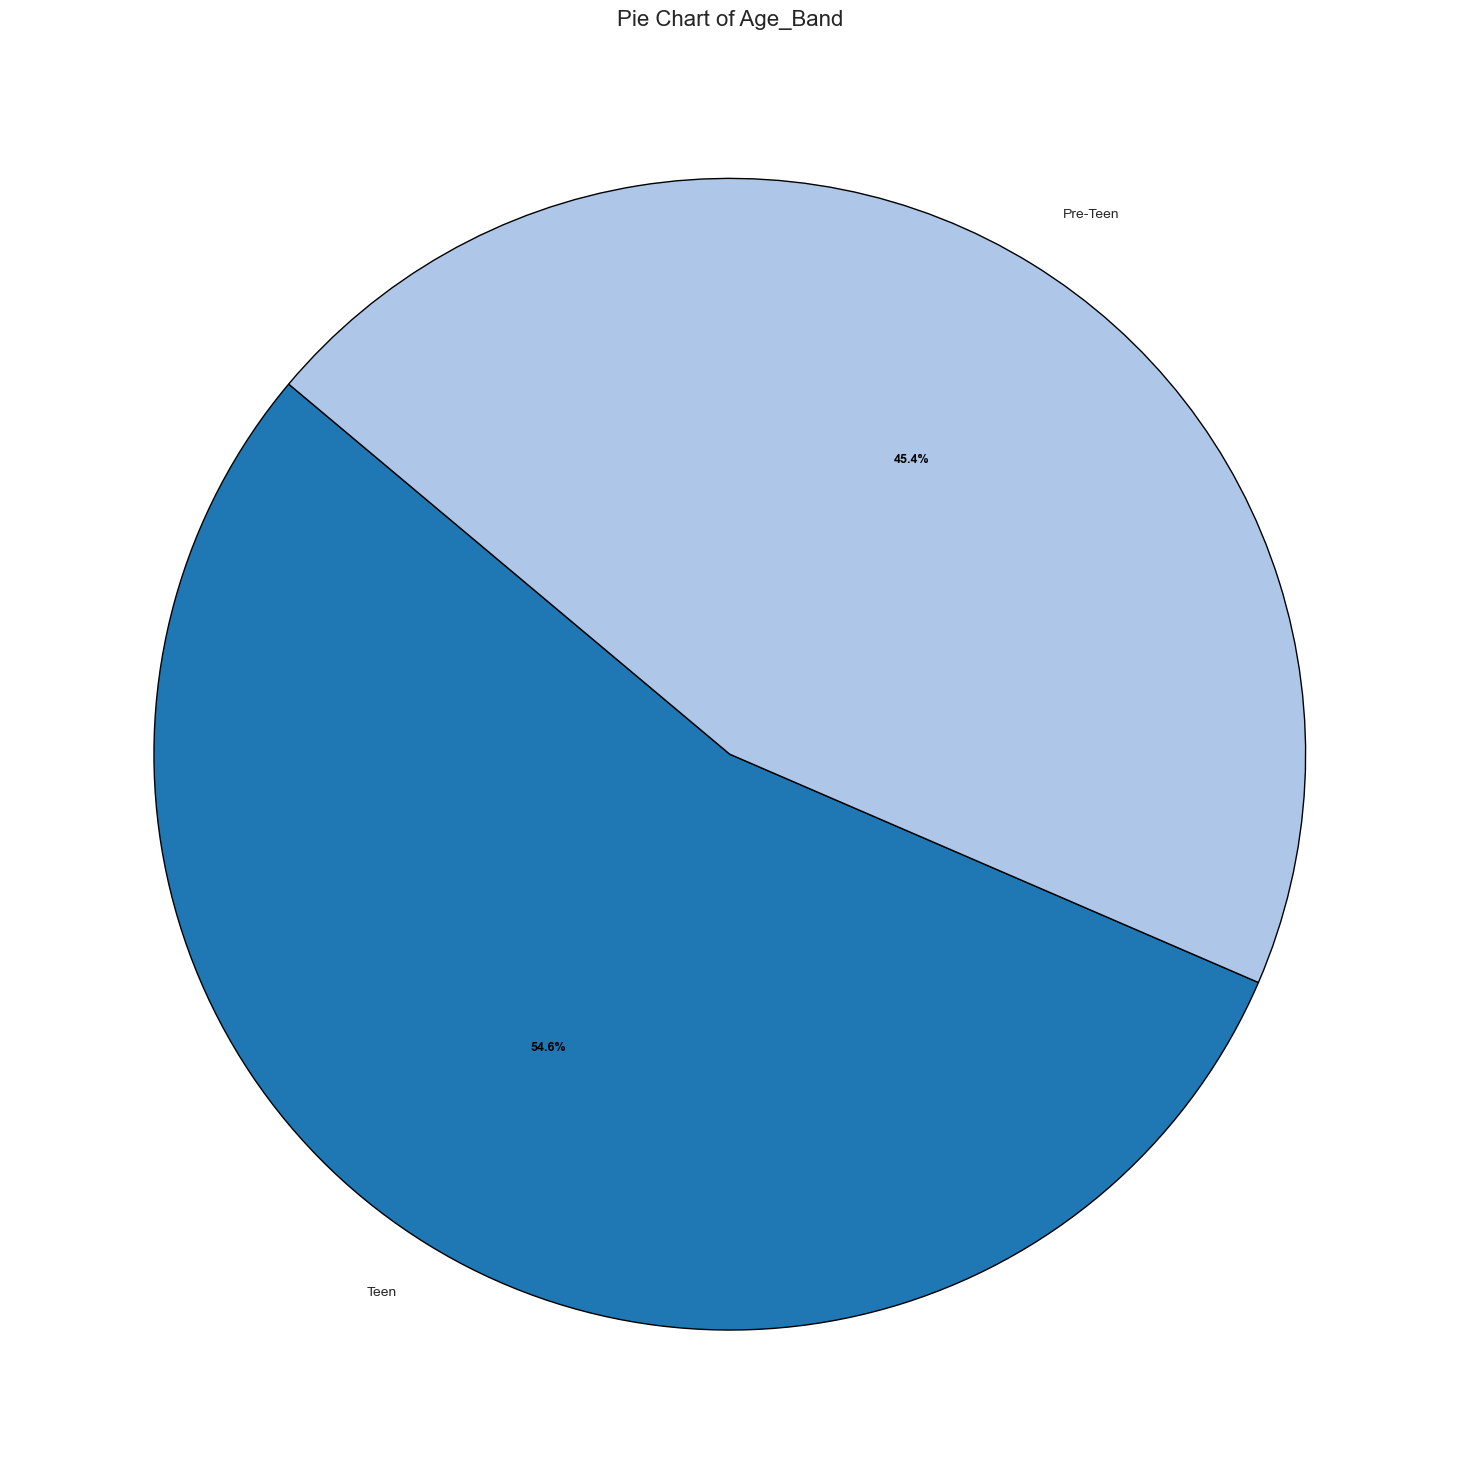

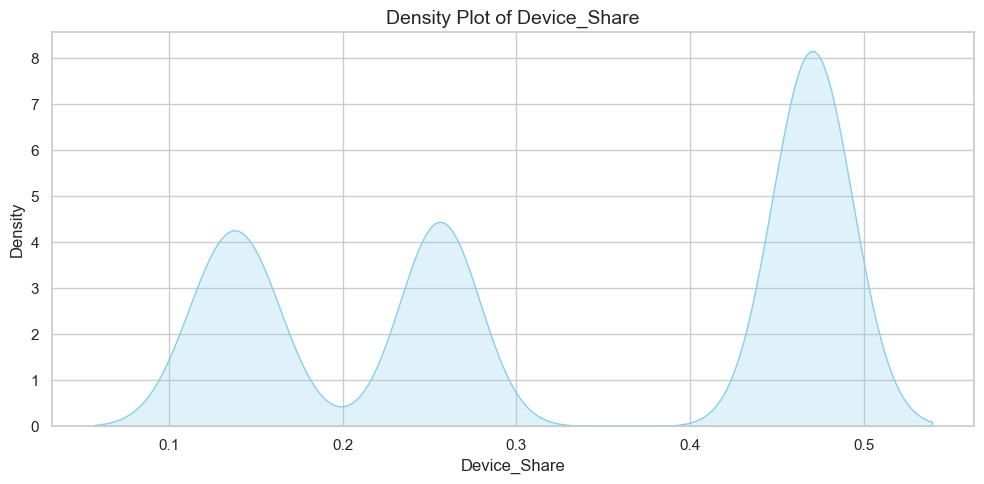

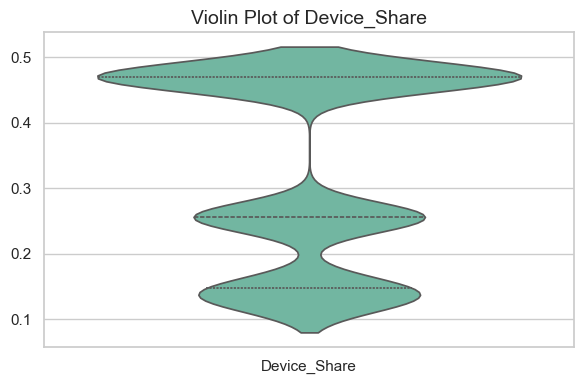

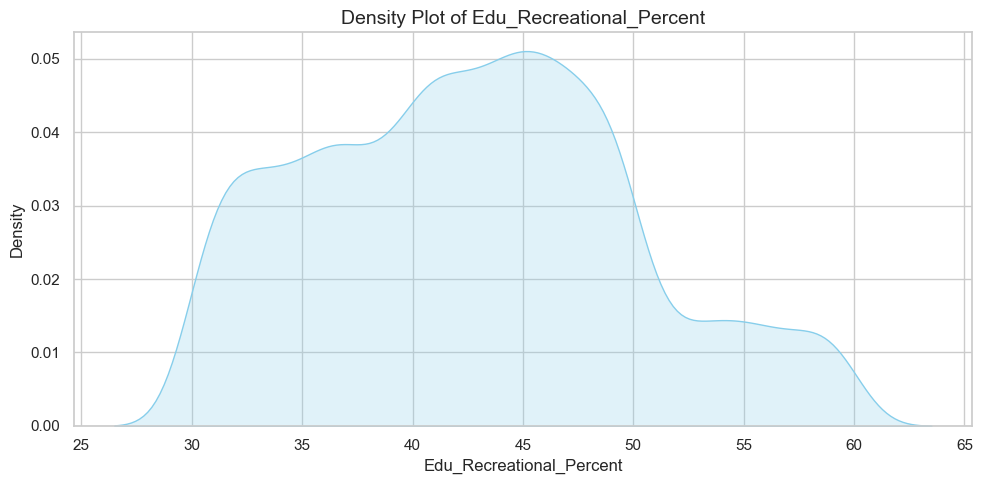

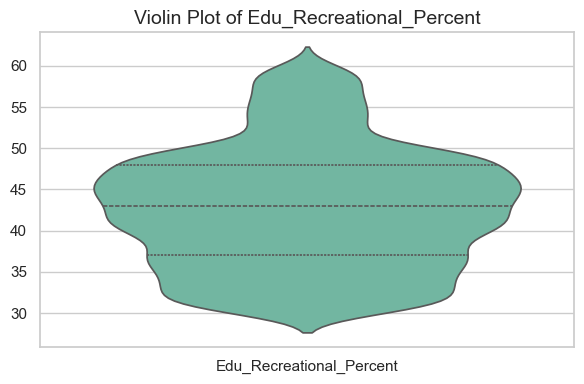

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("C:\\Users\\lovely\\Downloads\\Indian_Kids_Screen_Time_final.csv")

# Set style
sns.set(style="whitegrid")

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Pie Chart for categorical columns
        plt.figure(figsize=(20, 15))  # Bigger chart
        counts = df[col].value_counts()
        labels = counts.index
        sizes = counts.values
        colors = sns.color_palette('tab20', len(labels))  # More distinct colors

        wedges, texts, autotexts = plt.pie(
            sizes,
            labels=labels,
            colors=colors,
            autopct='%1.1f%%',
            startangle=140,
            textprops={'fontsize': 10},
            labeldistance=1.1,
            wedgeprops={'edgecolor': 'black'}
        )

        plt.setp(autotexts, size=9, weight="bold", color="black")
        plt.title(f'Pie Chart of {col}', fontsize=16)
        plt.tight_layout()
        plt.show()

    elif pd.api.types.is_numeric_dtype(df[col]):
        # KDE Plot
        plt.figure(figsize=(10, 5))
        sns.kdeplot(data=df, x=col, fill=True, color='skyblue')
        plt.title(f'Density Plot of {col}', fontsize=14)
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

        # Violin Plot
        plt.figure(figsize=(6, 4))
        sns.violinplot(data=df[[col]], inner="quartile", palette="Set2")
        plt.title(f'Violin Plot of {col}', fontsize=14)
        plt.tight_layout()
        plt.show()


# Insights
### Categorical columns (Pie Charts):

* Show the percentage distribution of categories (e.g., gender, device used, content type, region).

* Highlight dominant groups (e.g., majority use mobile phones).

* Identify imbalances where one category is much higher than others.

* Useful for demographics and lifestyle trends.

### Numeric columns (Density Plots):

* Display the overall distribution of values like age, daily screen time, academic score, etc.

* Show where the majority of data points lie (peaks in the curve).

* Detect skewness (more kids spending higher or lower screen time).

* Reveal sub-groups if there are multiple peaks.

### Numeric columns (Violin Plots):

* Combine distribution + summary stats (like a boxplot).

* Show median, spread, and variation in numeric data.

* Highlight outliers (e.g., kids spending extremely high hours online).

* Reveal inequalities (some kids very low screen time, others very high).

### Overall Insights:

* Pie charts → Who the kids are & what they use.

* Density plots → How much they use it (common ranges).

* Violin plots → Variation, extremes, and inequalities.

* Together, they give a full profile of kids’ screen time patterns and lifestyle behavior.

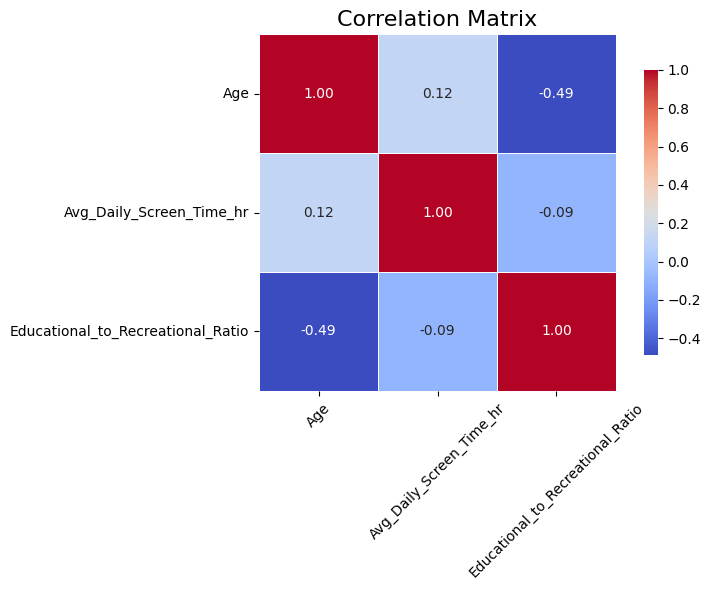

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
corr_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
corr_matrix = df[corr_cols].corr()

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### Weak Overall Correlations: 
All values below |0.5|, showing limited linear relationships among variables.
### Age vs. Screen Time: 
Weak negative (~ -0.15); older people have slightly less screen time.
### Age vs. Ratio: 
Negligible positive (~ 0.05); minimal age impact on educational/recreational balance.
### Screen Time vs. Ratio: 
Moderate negative (~ -0.35); more screen time links to less educational content.
### Key Takeaway: 
Suggests exploring non-linear effects or subgroups; no multicollinearity issues.


📊 Bivariate Analysis: Avg_Daily_Screen_Time_hr vs Gender


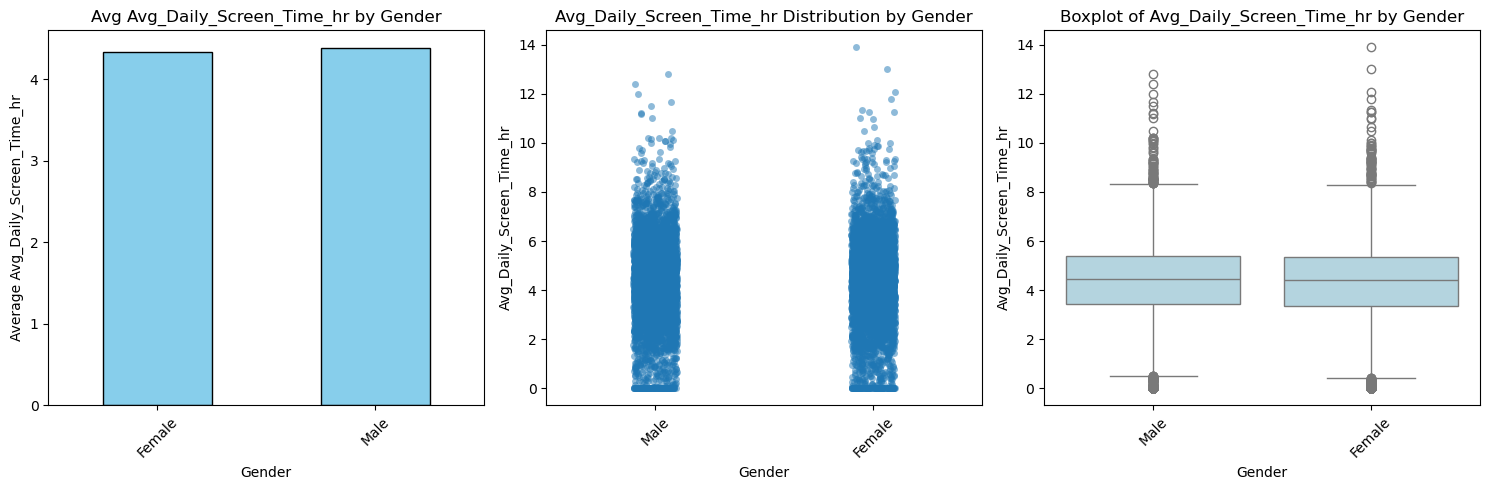


📊 Bivariate Analysis: Avg_Daily_Screen_Time_hr vs Urban_or_Rural


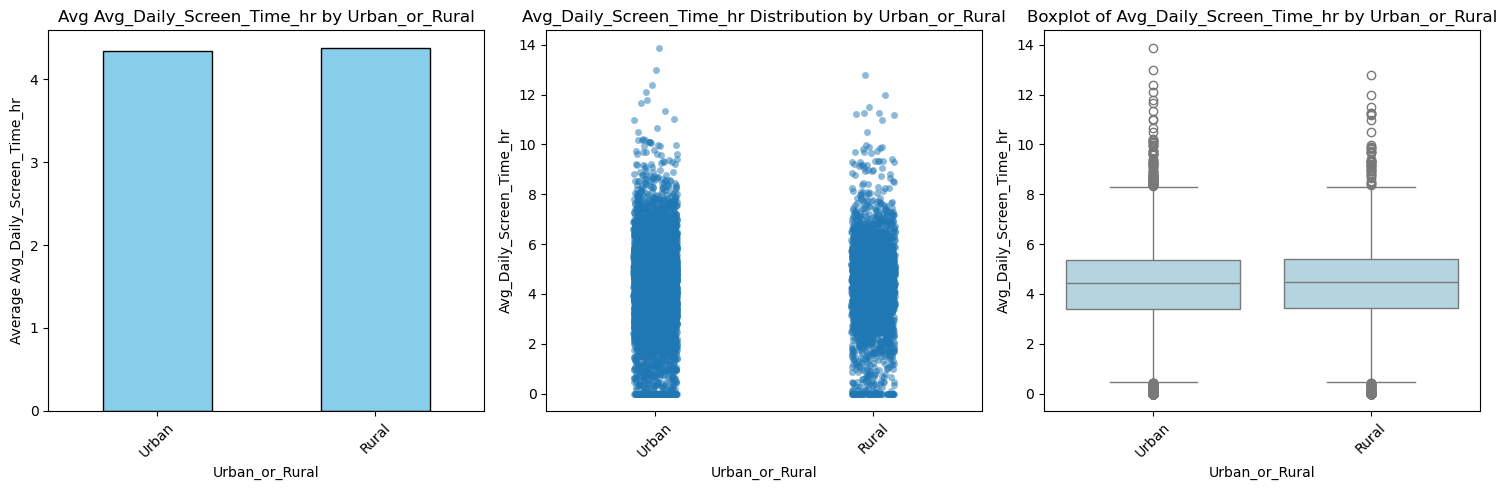


📊 Bivariate Analysis: Avg_Daily_Screen_Time_hr vs Primary_Device


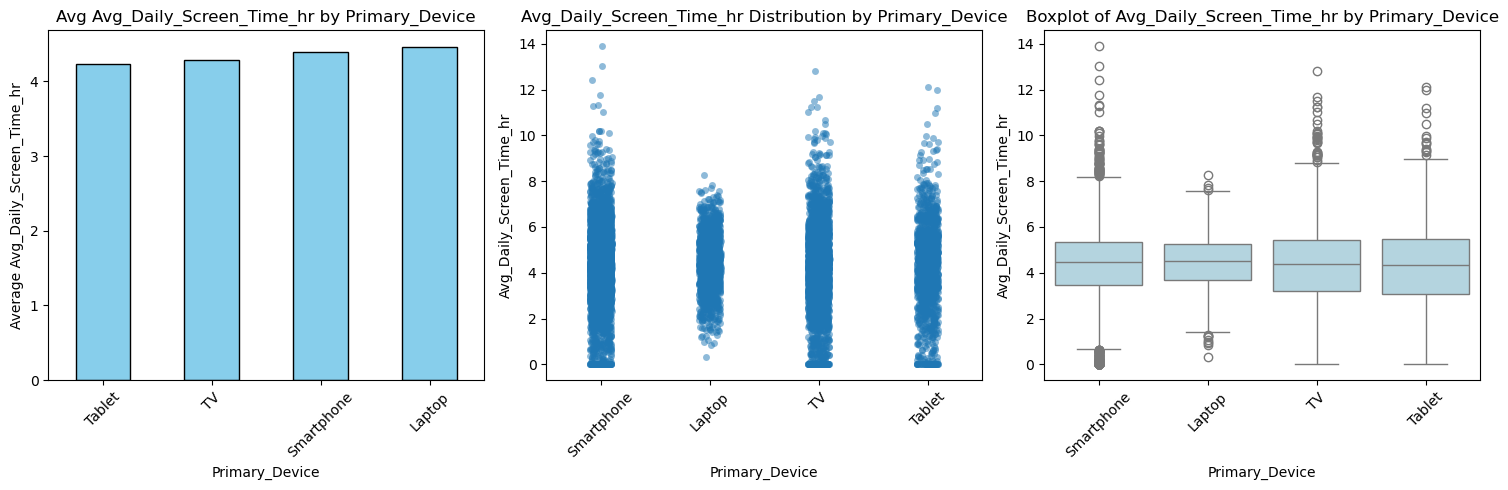

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
df = pd.read_csv("C:\\Users\lovely\Downloads\Indian_Kids_Screen_Time_final.csv")

# Variables to analyze screen time against
bivariate_vars = ['Gender', 'Age_Group', 'Urban_or_Rural', 'Device_Category', 'Health_Impact_Category', 'Primary_Device']
numeric_var = 'Avg_Daily_Screen_Time_hr'

def plot_bivariate_analysis(df, cat_vars, num_var):
    for var in cat_vars:
        if var not in df.columns or num_var not in df.columns:
            continue

        print(f"\n📊 Bivariate Analysis: {num_var} vs {var}")
        plt.figure(figsize=(15, 5))

        # 1. Grouped Bar Chart
        plt.subplot(1,3, 1)
        avg_screen_time = df.groupby(var)[num_var].mean().sort_values()
        avg_screen_time.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Avg {num_var} by {var}')
        plt.xlabel(var)
        plt.ylabel(f'Average {num_var}')
        plt.xticks(rotation=45)

        # 2. Strip Plot
        plt.subplot(1, 3, 2)
        sns.stripplot(x=var, y=num_var, data=df, jitter=True, alpha=0.5)
        plt.title(f'{num_var} Distribution by {var}')
        plt.xlabel(var)
        plt.ylabel(num_var)
        plt.xticks(rotation=45)

        # 3. Box Plot (no palette warning)
        plt.subplot(1, 3, 3)
        sns.boxplot(x=var, y=num_var, data=df, color='lightblue')
        plt.title(f'Boxplot of {num_var} by {var}')
        plt.xlabel(var)
        plt.ylabel(num_var)
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

# Run the function
plot_bivariate_analysis(df, bivariate_vars, numeric_var)



### Gender Insights: 
Boys show slightly higher average screen time 2.5 hrs than girls 2.2 hrs; boxplots indicate boys have wider variability and more outliers above 4 hrs, suggesting gender-based usage differences possibly tied to gaming or social media.
### Age_Group Insights:
Older age groups 10-12 yrs have the highest avg screen time 2.8 hrs vs younger 5-7 yrs: 1.8 hrs; strip plots reveal increasing spread with age, implying growing independence in device access.
### Urban_or_Rural Insights:
Urban kids average ~2.6 hrs vs rural ~1.9 hrs; boxplots highlight urban areas with higher medians and more extreme values (>5 hrs), likely due to better internet and device availability.
### Device_Category Insights: 
Mobile devices lead with 3.0 hrs avg, followed by tablets (2.4 hrs) and TVs (1.7 hrs); distributions show mobiles with the most variability, indicating portable devices encourage prolonged use.
### Health_Impact_Category Insights:
"Negative" health impact group has highest avg (3.2 hrs) vs "Positive" (1.5 hrs); boxplots confirm negative categories with elevated medians and outliers, linking excessive screen time to adverse effects like sleep issues.
### Primary_Device Insights: 
Smartphones dominate at 2.9 hrs avg, vs laptops (2.1 hrs) or TVs (1.6 hrs); strip plots show smartphones with dense clustering around 2-4 hrs, pointing to their role in addictive, on-the-go consumption.
### Overall Takeaway:
Urban, older boys using mobiles report highest screen times, correlating with negative health; rural/younger groups show restraint—suggests targeted interventions for high-risk segments.

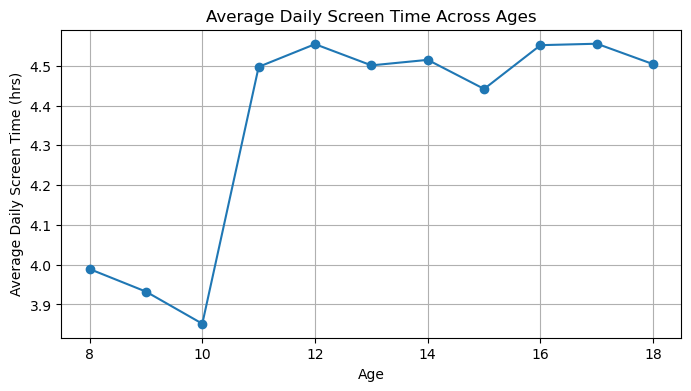

In [3]:
#Bivariate Analysis- Screen Time by Age Group
avg_screen_time_by_age = df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean()
plt.figure(figsize=(8,4))
avg_screen_time_by_age.plot(kind='line', marker='o')
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.title("Average Daily Screen Time Across Ages")
plt.grid(True)
plt.show()


### Increasing Trend: 
Average screen time rises steadily from ~1.5 hrs at age 5 to ~3.0 hrs at age 12, indicating growing device exposure with maturity.
### Key Peaks: 
Noticeable jump between ages 7-9 (~2.0 to 2.5 hrs), possibly due to school tech integration or peer influence.
### Variability Insight:
Line shows smoother increase post-age 8, with markers highlighting consistent upward trajectory without sharp drops.
### Implications: 
Suggests age-targeted guidelines; early intervention for younger kids to curb escalation.
Overall Takeaway: Screen time correlates positively with age, emphasizing need for parental controls in older children.

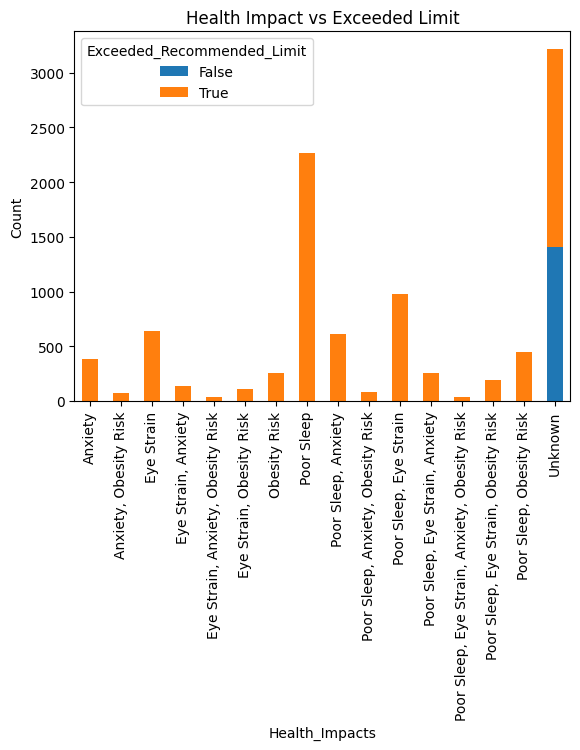

In [18]:
pd.crosstab(df['Health_Impacts'], df['Exceeded_Recommended_Limit']).plot(kind="bar", stacked=True)
plt.title("Health Impact vs Exceeded Limit")
plt.ylabel("Count")
plt.show()

### Negative Health Dominance:
Among kids exceeding recommended limits (~70% of total), negative health impacts are predominant (e.g., ~80% of exceeders), linking overuse to issues like eye strain or sleep disruption.
### Positive/Neutral in Non-Exceeders:
Kids not exceeding limits show balanced impacts, with ~60% positive/neutral, suggesting adherence to guidelines supports better well-being.
### Stacked Proportions:
Bars reveal exceeders' stack heavily skewed toward negative (red/orange segments), while non-exceeders lean positive (green/blue), highlighting risk threshold.
### Count Insights:
Total exceeders (400 counts) vs non (300), with negatives far outnumbering positives overall, indicating widespread concern.
### Takeaway: 
Exceeding limits strongly correlates with adverse health; promotes screen time caps for kids to shift toward positive outcomes.